<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration" data-toc-modified-id="Exploration-1">Exploration</a></span><ul class="toc-item"><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-1.1">Prepare data</a></span><ul class="toc-item"><li><span><a href="#Read-file" data-toc-modified-id="Read-file-1.1.1">Read file</a></span></li><li><span><a href="#Sample-data" data-toc-modified-id="Sample-data-1.1.2">Sample data</a></span></li><li><span><a href="#Change-columns" data-toc-modified-id="Change-columns-1.1.3">Change columns</a></span></li></ul></li><li><span><a href="#Coordinates" data-toc-modified-id="Coordinates-1.2">Coordinates</a></span></li></ul></li></ul></div>

# Exploration

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = (10, 7)

import pandas as pd
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 20)
pd.set_option('precision', 3)

## Prepare data

### Read file

In [13]:
%%time 

data = pd.read_feather('../data/data.feather')

print(f'Dataset shape: {data.shape}\n')
data.head(3)

Dataset shape: (65783796, 8)

CPU times: user 3.16 s, sys: 13.1 s, total: 16.2 s
Wall time: 45.3 s


,pickup_datetime,dropoff_datetime,passenger_count,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat
0,2015-01-01 00:00:00,2015-01-01 00:00:00,3,2.511,-74.001,40.729,-74.010,40.720
1,2015-01-01 00:00:00,2015-01-01 00:11:26,5,6.437,-73.971,40.760,-73.921,40.768
2,2015-01-01 00:00:03,2015-01-01 00:10:50,1,2.543,-73.988,40.765,-73.977,40.777


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65783796 entries, 0 to 65783795
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[ns]
 1   dropoff_datetime  datetime64[ns]
 2   passenger_count   int64         
 3   distance          float64       
 4   pickup_lon        float64       
 5   pickup_lat        float64       
 6   dropoff_lon       float64       
 7   dropoff_lat       float64       
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 3.9 GB


### Sample data

Memory usage: **3.9GB**. Let's take a sample to reduce the memory cosumption

In [14]:
%%time

sample_size = 1000000
seed = 234

np.random.seed(seed)

if data.shape[0] > sample_size:
    data = data.sample(sample_size).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pickup_datetime   1000000 non-null  datetime64[ns]
 1   dropoff_datetime  1000000 non-null  datetime64[ns]
 2   passenger_count   1000000 non-null  int64         
 3   distance          1000000 non-null  float64       
 4   pickup_lon        1000000 non-null  float64       
 5   pickup_lat        1000000 non-null  float64       
 6   dropoff_lon       1000000 non-null  float64       
 7   dropoff_lat       1000000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 61.0 MB
CPU times: user 5.34 s, sys: 8.98 s, total: 14.3 s
Wall time: 22.1 s


### Change columns

In this exercise we are interested only in pickup locations and pickup time. Other columns are not needed and I will drop them

In [43]:
def drop_columns(data: pd.DataFrame, rename_columns: dict) -> None:
    drop_columns = [
        'dropoff_datetime',
        'passenger_count',
        'distance',    
        'dropoff_lon',
        'dropoff_lat'
    ]
    
    # drop only of columns are still in the dataset
    if drop_columns[0] in data.columns:
        data.drop(drop_columns, axis=1, inplace=True)
        
    data.rename(columns=rename_columns, inplace=True)

drop_columns(data, {
    'pickup_datetime': 'datetime',
    'pickup_lat': 'lat',
    'pickup_lon': 'lon'
})

data.head(3)

,datetime,lon,lat
0,2015-02-03 06:53:45,-73.977,40.749
1,2015-01-28 06:51:39,-73.976,40.748
2,2015-06-26 08:35:58,-73.976,40.792


## Coordinates

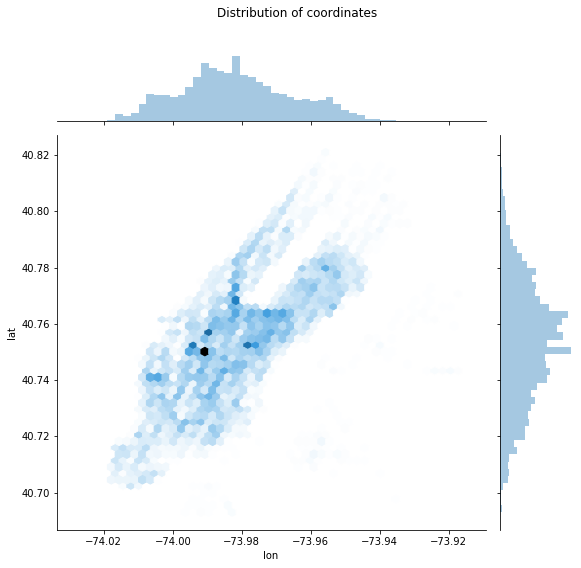

In [87]:
sns.jointplot(data=data, x='lon', y='lat', kind='hex', height=8);

plt.suptitle('Distribution of coordinates');
plt.subplots_adjust(top=0.9);